In [79]:
import pandas as pd    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score 
from IPython.display import Image 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import graphviz


In [80]:
#pip install graphviz

In [81]:
df=sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [82]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [83]:
df["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [84]:
df["species"]=df["species"].replace({"setosa":0,"versicolor":1,"virginica":2})

In [85]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [86]:
x=df.drop(columns=["species"])
y=df["species"]

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1200)

In [88]:
print(y_train.shape)
print(x_train.shape)


(112,)
(112, 4)


In [89]:
dtc=DecisionTreeClassifier()

In [90]:
 dtc.fit(x_train,y_train ## training

DecisionTreeClassifier()

In [91]:
y_pred=dtc.predict(x_test)
print(y_pred)

[1 1 0 2 2 1 0 1 2 1 0 2 0 2 0 1 0 1 1 1 0 2 1 0 0 1 1 1 1 2 1 2 2 1 2 0 0
 2]


In [92]:
### Evaluate tha model

In [93]:
ac=accuracy_score(y_test,y_pred)
ac

0.9210526315789473

In [94]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  3, 11]], dtype=int64)

In [95]:
f1_score(y_test,y_pred,average='weighted')

0.9203992740471869

In [96]:
### accuracy oftraining data

In [97]:
y_pred_train=dtc.predict(x_train)

In [98]:
accuracy_score(y_train,y_pred_train)

1.0

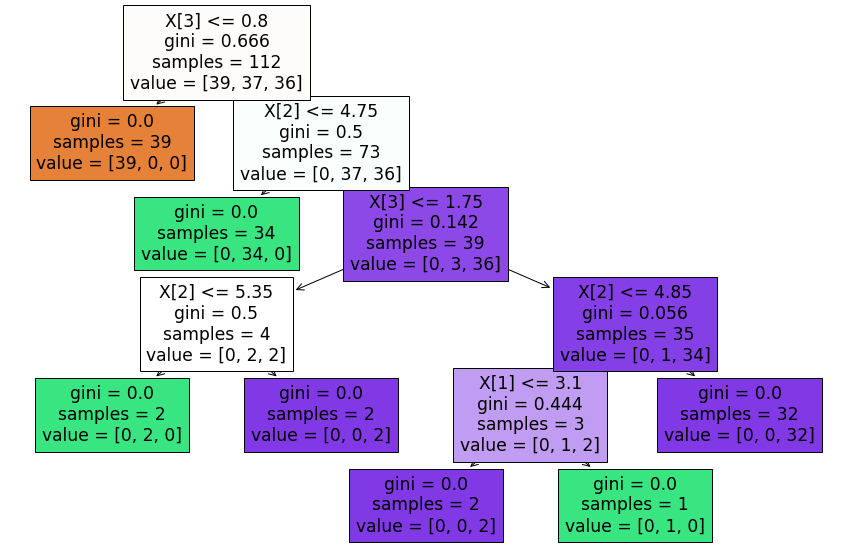

In [99]:
plt.figure(figsize=(15,10))
tree.plot_tree(dtc,filled=True)
plt.show()



In [100]:
## maxm depth, min sample leaf, min sample split

In [118]:
dtc_u=DecisionTreeClassifier(max_depth=1)

In [119]:
dtc_u.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [120]:
y_pred_u=dtc_u.predict(x_test)

In [121]:
accuracy_score(y_test,y_pred_u)

0.631578947368421

In [122]:
y_pred_u_train=dtc_u.predict(x_train)

In [123]:
accuracy_score(y_train,y_pred_u_train)

0.6785714285714286

In [124]:
dtc_u=DecisionTreeClassifier(min_samples_split=60)

In [125]:
plt.figure(figsize=(15,10))
tree.plot_tree(dtc_u,filled=True)
plt.show()

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<Figure size 1080x720 with 0 Axes>

In [110]:
dtc_u=DecisionTreeClassifier(min_samples_split=60)

In [111]:
dtc_u.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=60)

In [112]:
y_pred_u=dtc_u.predict(x_test)

In [113]:
accuracy_score(y_test,y_pred_u)

0.8947368421052632

In [114]:
y_pred_u_train=dtc_u.predict(x_train)

In [115]:
accuracy_score(y_train,y_pred_u_train)

0.9732142857142857

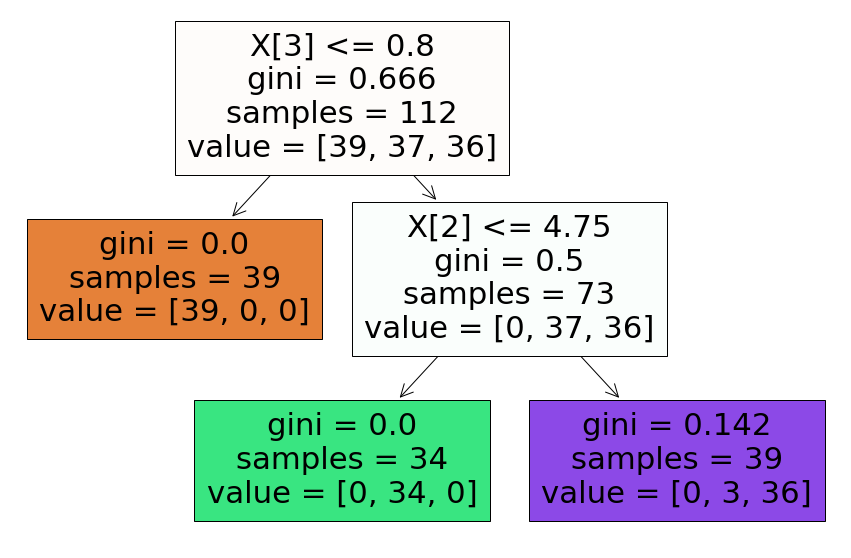

In [116]:
plt.figure(figsize=(15,10))
tree.plot_tree(dtc_u,filled=True)
plt.show()

In [41]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}


In [42]:
grid_search = GridSearchCV(estimator=dtc,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1) 


In [43]:
grid_search.fit(x_train,y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [45]:
grid_search.best_score_


1.0

In [47]:
 best_parameters = grid_search.best_params_
print(best_parameters)



{'criterion': 'gini', 'max_depth': 27, 'min_samples_leaf': 3, 'min_samples_split': 8, 'splitter': 'random'}


In [48]:
treemodel=DecisionTreeClassifier(criterion="gini",max_depth=4,min_samples_leaf=3,min_samples_split= 2,splitter ='random')

In [49]:
treemodel.fit(x_train,y_train)



DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, splitter='random')

In [50]:
y_pred=treemodel.predict(x_test)


In [51]:
ac=accuracy_score(y_test,y_pred)
ac

0.9473684210526315